# Example of Liftingline Analysis

In [1]:
# numpy and matplotlib imports
import numpy as np
from matplotlib import pyplot as plt

# import of wingstructure submodels
from wingstructure import data, aero

## Creating wing defintion

In [2]:
# create wing object
wing = data.Wing()

# add sections to wing
# leading edge position, chord length, twist
wing.append((0.0, 0.0, 0.0), 1.0, 0.0)
wing.append((0.05, 4.25, 0.0), 0.7, 0.0)
wing.append((0.1, 7.75, 0.0), 0.35, 0.0)

# define spoiler position
wing.add_controlsurface('BK', 1.5, 2.9, 0.5, 0.5, 'airbrake')

# define control-surfaces
wing.add_controlsurface('flap', 1, 2.8, 0.7, 0.7, 'aileron')
wing.add_controlsurface('flap2', 4.25, 7, 0.7, 0.8, 'aileron')

## Lift calculation using LiftAnalysis object

The LiftAnalysis object calculates base lift distributions (e.q. for aerodynamical twist, control surfaces and so on) and only superposes those, when calculations are invoked.

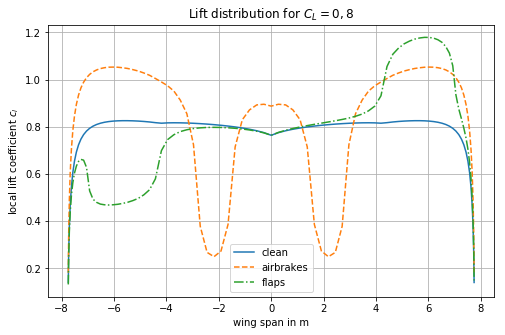

In [3]:
liftana = aero.LiftAnalysis.generate(wing)

span_pos = liftana.ys

α, distribution, C_Dib = liftana.calculate(C_L=0.8)
α_qr, distribution_q, C_Dia = liftana.calculate(C_L=0.8, 
            controls={'flap2': [5, -5]})
α_ab, distribution_ab, C_Di = liftana.calculate(C_L=0.8, airbrake=True)

plt.figure(figsize=(8,5))
plt.plot(span_pos, distribution, label='clean')
plt.plot(span_pos, distribution_ab, '--', label='airbrakes')
plt.plot(span_pos, distribution_q, '-.', label='flaps')
plt.xlabel('wing span in m')
plt.ylabel('local lift coefficient $c_l$')
plt.title('Lift distribution for $C_L = 0,8$')
plt.grid()
plt.legend()
plt.savefig('Liftdistribution.png')
plt.savefig('Liftdistribution.pdf')

## Lift calculation using calculate function

The calculate function does only calculate those distributions needed and does not cache results. Furhtermore it allows for calculation of moment coefficent regarding x axis (flight direction). This coefficient is defined as follows:

$$ C_\mathrm{Mx} = \frac{M_\mathrm{x}}{q S b}.$$

$q$ - dynamic pressure

$S$ - wing surface

$b$ - wing span


In [4]:
aero.calculate(wing, C_L=1.0, controls={'flap':(5,-5)}, calc_cmx=True)

{'c_ls': array([0.17473459, 0.33326401, 0.47010156, 0.58469103, 0.67862726,
        0.75453728, 0.81523445, 0.86345503, 0.90154854, 0.93156751,
        0.95511343, 0.9735582 , 0.98789193, 0.9989971 , 1.0074442 ,
        1.01380467, 1.01837533, 1.02154146, 1.02341644, 1.02427782,
        1.02410032, 1.02309912, 1.02111525, 1.01831902, 1.01436698,
        1.00934794, 1.00248884, 0.99566757, 0.9914859 , 0.98412242,
        0.97100622, 0.95091534, 0.90618908, 0.79058854, 0.75002864,
        0.73605463, 0.73133675, 0.73669252, 0.75109217, 0.79059341,
        0.89734019, 0.9351323 , 0.94950271, 0.95520178, 0.98879435,
        1.02321934, 1.07704511, 1.19691558, 1.24748806, 1.27127893,
        1.28468676, 1.28683302, 1.27868794, 1.24296583, 1.13125853,
        1.08943481, 1.07119468, 1.05866911, 1.05032597, 1.04259539,
        1.04151544, 1.04199052, 1.04241173, 1.04243856, 1.0423244 ,
        1.04173604, 1.0407939 , 1.03920208, 1.03698727, 1.03384661,
        1.02970313, 1.02419477, 1.017102